## Telecom churn case 

#### <font color= Purple>Problem Statement:</font>
`Context`:
The telecom industry is marked by intense competition, with customers having the flexibility to switch service providers easily. High customer churn rates pose a significant challenge for telecom companies, impacting profitability. Recognizing the importance of customer retention, this project focuses on leveraging machine learning to predict potential churners among high-value customers. By identifying customers at risk of leaving, the telecom company can implement targeted strategies, such as special plans and discounts, to retain them.

`Objective`:
- Develop machine learning models to predict churn among high-value customers.
- Identify key variables that strongly contribute to predicting churn, providing insights into customer behavior.
- Evaluate model performance using metrics like overall accuracy, precision, recall, etc., considering diverse business objectives.
- Recommend strategies for managing customer churn based on observations and model outputs.

`Data Overview`:
The dataset includes customer-level information with around 170 features, covering aspects like behavior, usage patterns, payment details, etc. The data dictionary provides meanings for common abbreviations, facilitating a better understanding of the attributes. And it should be noted that attributes with suffixes 6, 7, and 8 correspond to the months June, July, and August, respectively.

The notebook contains the following contents:

- Data Understanding and Pre-Processing
- Exploratory Data Analysis (EDA)
- Feature Engineering and Variable Transformation
- Data preparation
- Model Selection, Building, and Prediction
- Recommendations

## Data understanding 

Begining by importing libraries and loading the dataset

In [526]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

In [446]:
# Reading the data
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(36, 2)


In [4]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
# Data statistics
data.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [7]:
# Select columns with data type 'object'
data.select_dtypes(include=['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [8]:
data.select_dtypes(include=['float']).head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [9]:
## Selecting date type columns
date_columns = [col for col in data.columns if 'date' in col.lower()]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [447]:
# Segregating the columns according the variable dtypes
# Categorical columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
# Identifier column
id_col = ['circle_id']

# Date columns
date_cols = ['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

# Numerical columns (excluding identifier, date, and categorical columns)
num_cols = [column for column in data.columns if column not in id_col + date_cols + cat_cols]

### Data Pre-processing

In [12]:
# look at missing value ratio in each column
data.isnull().sum()*100/data.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [58]:
# Calculate the percentage of missing values in each column of the training data
missing_data_percent = 100*data.isnull().sum()/len(data)
# Sort the missing data percentages in descending order
missing_data_percent.sort_values(inplace=True, ascending=False)
 # Display the sorted missing data percentages
missing_data_percent

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
                              ...    
last_day_rch_amt_8           0.000000
vol_2g_mb_6                  0.000000
vol_2g_mb_7                  0.000000
vol_2g_mb_8                  0.000000
churn_probability            0.000000
Length: 172, dtype: float64

### <font color= purple>Observations:</font>
- Although some of these faetures exhibit high missing values more than 70%, according to business perspective, some variables like the data reacharge and avergae recharge of a month are potential behavioural predictors for whether a customer might churn or not, so we will be holding on to them till we impute it within reason.   

### Imputing missing values 

####  We will take a closer look into the recharge columns to gain more insights

In [448]:
# List of columns related to recharge information
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

# Descriptive statistics for the recharge related columns in the training data
data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


### Let's check whether there are cases where the customer didn't recharge that month by seeing if both the total recharge column and the date of last recharge for that month is missing meaning 0. 

In [379]:
### Checking for the month of June 
# Selecting rows where both total_rech_data_6 and date_of_last_rech_data_6 are null
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(15)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


### <font color= purple>Observations:</font>
In the recharge variables, when the minimum value is 1, we can infer that missing values should be replaced with zeros. This is because a minimum value of 1 suggests that the customer did not recharge their number during that specific month. Therefore, substituting missing values with zeros accurately reflects the absence of any recharge activity for that particular period.

In [449]:
### Creating a list of the total recharge, max recharge and average recharge which will be imputed with 0. 
impute_0_lst = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
       ]

In [450]:
## Imputing missing values with 0
data[impute_0_lst] = data[impute_0_lst].apply(lambda x: x.fillna(0))

In [451]:
# impute missing values with 0 in unseen as well
unseen[impute_0_lst] = unseen[impute_0_lst].apply(lambda x: x.fillna(0))

In [452]:
## Checking if the values were imputed correctly
data[impute_0_lst].isnull().sum()*100/data.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [453]:
# Shape of X_train before dropping date columns
data.shape

(69999, 172)

In [454]:
# Shape of X_train after dropping columns
data = data.drop(date_cols, axis=1)
data.shape

(69999, 163)

#### Missing values in categorical variables

To address missing values in categorical data, we will substitute them with '-1', which will represent a distinct category. This approach ensures that the absence of information is explicitly marked, creating a new and easily identifiable category that distinguishes missing values from other existing categories.

In [455]:
## Replacing missing values in categorical columns with -1
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [456]:
## Checking the ratio of missing values for cat_cols
data[cat_cols].isnull().sum()*100/data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [457]:
# replace missing values with '-1' in categorical columns of unseen set as well
unseen[cat_cols] = unseen[cat_cols].apply(lambda x: x.fillna(-1))

### Handing the remaining missing values in the dataset

In [389]:
missing_values = 100*data.isnull().sum()/len(data)
missing_values.sort_values(inplace=True, ascending=False)
missing_values

arpu_3g_6             74.902499
count_rech_3g_6       74.902499
count_rech_2g_6       74.902499
arpu_2g_6             74.902499
count_rech_3g_7       74.478207
                        ...    
max_rech_data_7        0.000000
max_rech_data_8        0.000000
av_rech_amt_data_6     0.000000
av_rech_amt_data_7     0.000000
churn_probability      0.000000
Length: 163, dtype: float64

### <font color= purple>Observations:</font>
- Since we have already dealt with the potentially important features such as the recharges columns, we can go ahead and remove the rest of the high missing columns what do not seem too important with our objective at hand. 

## Dropping variables with more than 70% missing values

In [458]:
# Calculate the total number of columns in the dataset
all_cols = data.shape[1]

# Set the threshold for missing values
missing_threshold = 0.7

# Create a list of boolean values indicating whether each column meets the missing value threshold
filtered_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < missing_threshold else False))

# Create a DataFrame to store the columns and their inclusion status based on the missing value threshold
cols_to_be_dropped = pd.DataFrame({'features': data.columns, 'include': filtered_cols})

# Filter the DataFrame to include only the columns that meet the missing value threshold
cols_to_be_dropped.loc[cols_to_be_dropped.include == True, :]

,features,include
0,id,True
1,circle_id,True
2,loc_og_t2o_mou,True
3,std_og_t2o_mou,True
4,loc_ic_t2o_mou,True
...,...,...
158,aon,True
159,aug_vbc_3g,True
160,jul_vbc_3g,True
161,jun_vbc_3g,True


In [459]:
# Removing the columns with more than 70% missing values
data = data.loc[:, filtered_cols]

In [460]:
# Calculate the number of columns dropped by subtracting the number of columns in the original dataset from the number of columns in the modified dataset
dropped_cols = data.shape[1] - all_cols
# Print the number of columns dropped
print("{0} columns were dropped.".format(dropped_cols))

-12 columns were dropped.


In [461]:
# Get the names of dropped columns
dropped_columns = cols_to_be_dropped.loc[cols_to_be_dropped.include == False, 'features'].tolist()
print("Dropped Columns:", dropped_columns)

Dropped Columns: ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


In [462]:
# List ofthe 12 columns to be deleted from the dataset
cols_del_12 = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
            'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
            'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
            'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [463]:
### Removing 'circle_id' from the dataframe 

data = data.drop('circle_id', axis=1)

In [464]:
## Looking at the shape of the dataset after the 12 variables were dropped
data.shape

(69999, 150)

#### Dealing with  the coulumns with less than 70% missing values

Since it is not advisable to remove features with very little missing values and we need to make sure that the dataset do not contain any nan values before we fit it to a model for prediction, we will use SimpleImputer which will fill missing values with 0.

In [397]:
## Checking the variables with less than 70% missing values
missing_values = 100*data.isnull().sum()/len(data)
missing_values.sort_values(inplace=True, ascending=False)
missing_values

std_ic_t2t_mou_8     5.290076
roam_og_mou_8        5.290076
std_og_t2c_mou_8     5.290076
loc_og_t2m_mou_8     5.290076
loc_ic_t2f_mou_8     5.290076
                       ...   
total_rech_data_8    0.000000
max_rech_data_6      0.000000
max_rech_data_7      0.000000
max_rech_data_8      0.000000
churn_probability    0.000000
Length: 150, dtype: float64

In [465]:
# Check for missing data in each column and return a boolean series indicating whether each column contains missing values
missing_data_percent = data.isnull().any()

# Filter the columns with missing values and store their names in the impute_cols variable
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index

# Display the columns with missing values
impute_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [466]:
# Create a SimpleImputer object with constant strategy and fill value of 0
imp = SimpleImputer(strategy='constant', fill_value=0)
# Fill missing values in the specified columns of the 'data' dataframe using the imputer
data[impute_cols] = imp.fit_transform(data[impute_cols])

In [467]:
## Checking for missing values
missing_values = 100*data.isnull().sum()/len(data)
missing_values.sort_values(inplace=True, ascending=False)
missing_values

id                   0.0
isd_ic_mou_6         0.0
isd_ic_mou_8         0.0
ic_others_6          0.0
ic_others_7          0.0
                    ... 
isd_og_mou_7         0.0
isd_og_mou_8         0.0
spl_og_mou_6         0.0
spl_og_mou_7         0.0
churn_probability    0.0
Length: 150, dtype: float64

In [468]:
# Create a SimpleImputer object for unseen data frame too
imp = SimpleImputer(strategy='constant', fill_value=0)
# Use the imputer to transform the selected columns in the 'unseen' dataframe
unseen[impute_cols] = imp.fit_transform(unseen[impute_cols])

### FIltering high value customers
We will calculate the total recharge a customer made in a month by adding the total data recharge and total recharge amount. The total data recharge in turn will be calculated by multiplying the total data recharge amount with the average recharge for that month. 

In [469]:
# Total data recharge for month 6 and 7 
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

# Total recharge amount for month 6 and 7 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [470]:
## Calculating the average recharge made by the customer in the months 6 and 7
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [471]:
# Determining the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [472]:
# Filtering only those customers who recharged for equal to or more than the 70th percentile amount i.e. our high value customers
data_filtered = data.loc[data.av_amt_data_6_7 >= data.av_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(21013, 155)

In [473]:
# deleting variables created to filter high-value customers
data_filtered = data_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
data_filtered.shape

(21013, 150)

### Handling outliers
Using K-sigma technique to remove outliers in the numerical columns

In [474]:
def cap_outliers(array, k=3):
    # Calculate the upper and lower limits for capping outliers
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    
    # Cap the outliers by replacing values below the lower limit with the lower limit
    array[array<lower_limit] = lower_limit
    # Cap the outliers by replacing values above the upper limit with the upper limit
    array[array>upper_limit] = upper_limit
    
    return array

In [475]:
exclude_num = ['id', 'churn_probability']

In [476]:
# Create a list of columns that are not in the specified lists
num_cols2 = [column for column in data_filtered.columns if column not in cols_del_12 + exclude_num + date_cols + cat_cols]

In [477]:
data_filtered[num_cols2] = data_filtered[num_cols2].apply(cap_outliers, axis=0)

## EDA

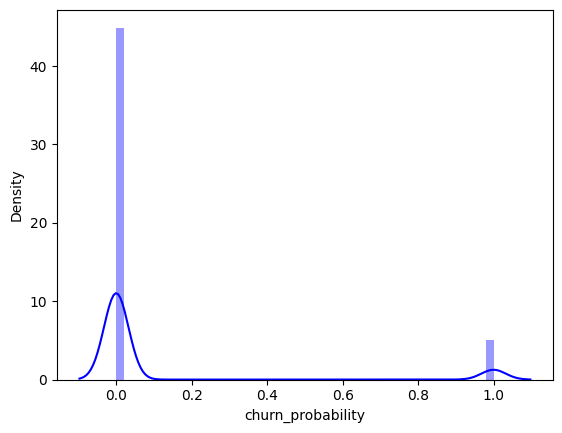

In [496]:
# Display a distribution plot of the 'churn_probability' column from the 'data' dataframe using seaborn
sns.distplot(data["churn_probability"], color='b')
# Display the plot
plt.show()

### <font color= purple>Observations:</font>
- We can clearly see that most of the users in this dataset belong to the not churnned category. We can easilty determine that the churn rate is on the lower side/density.

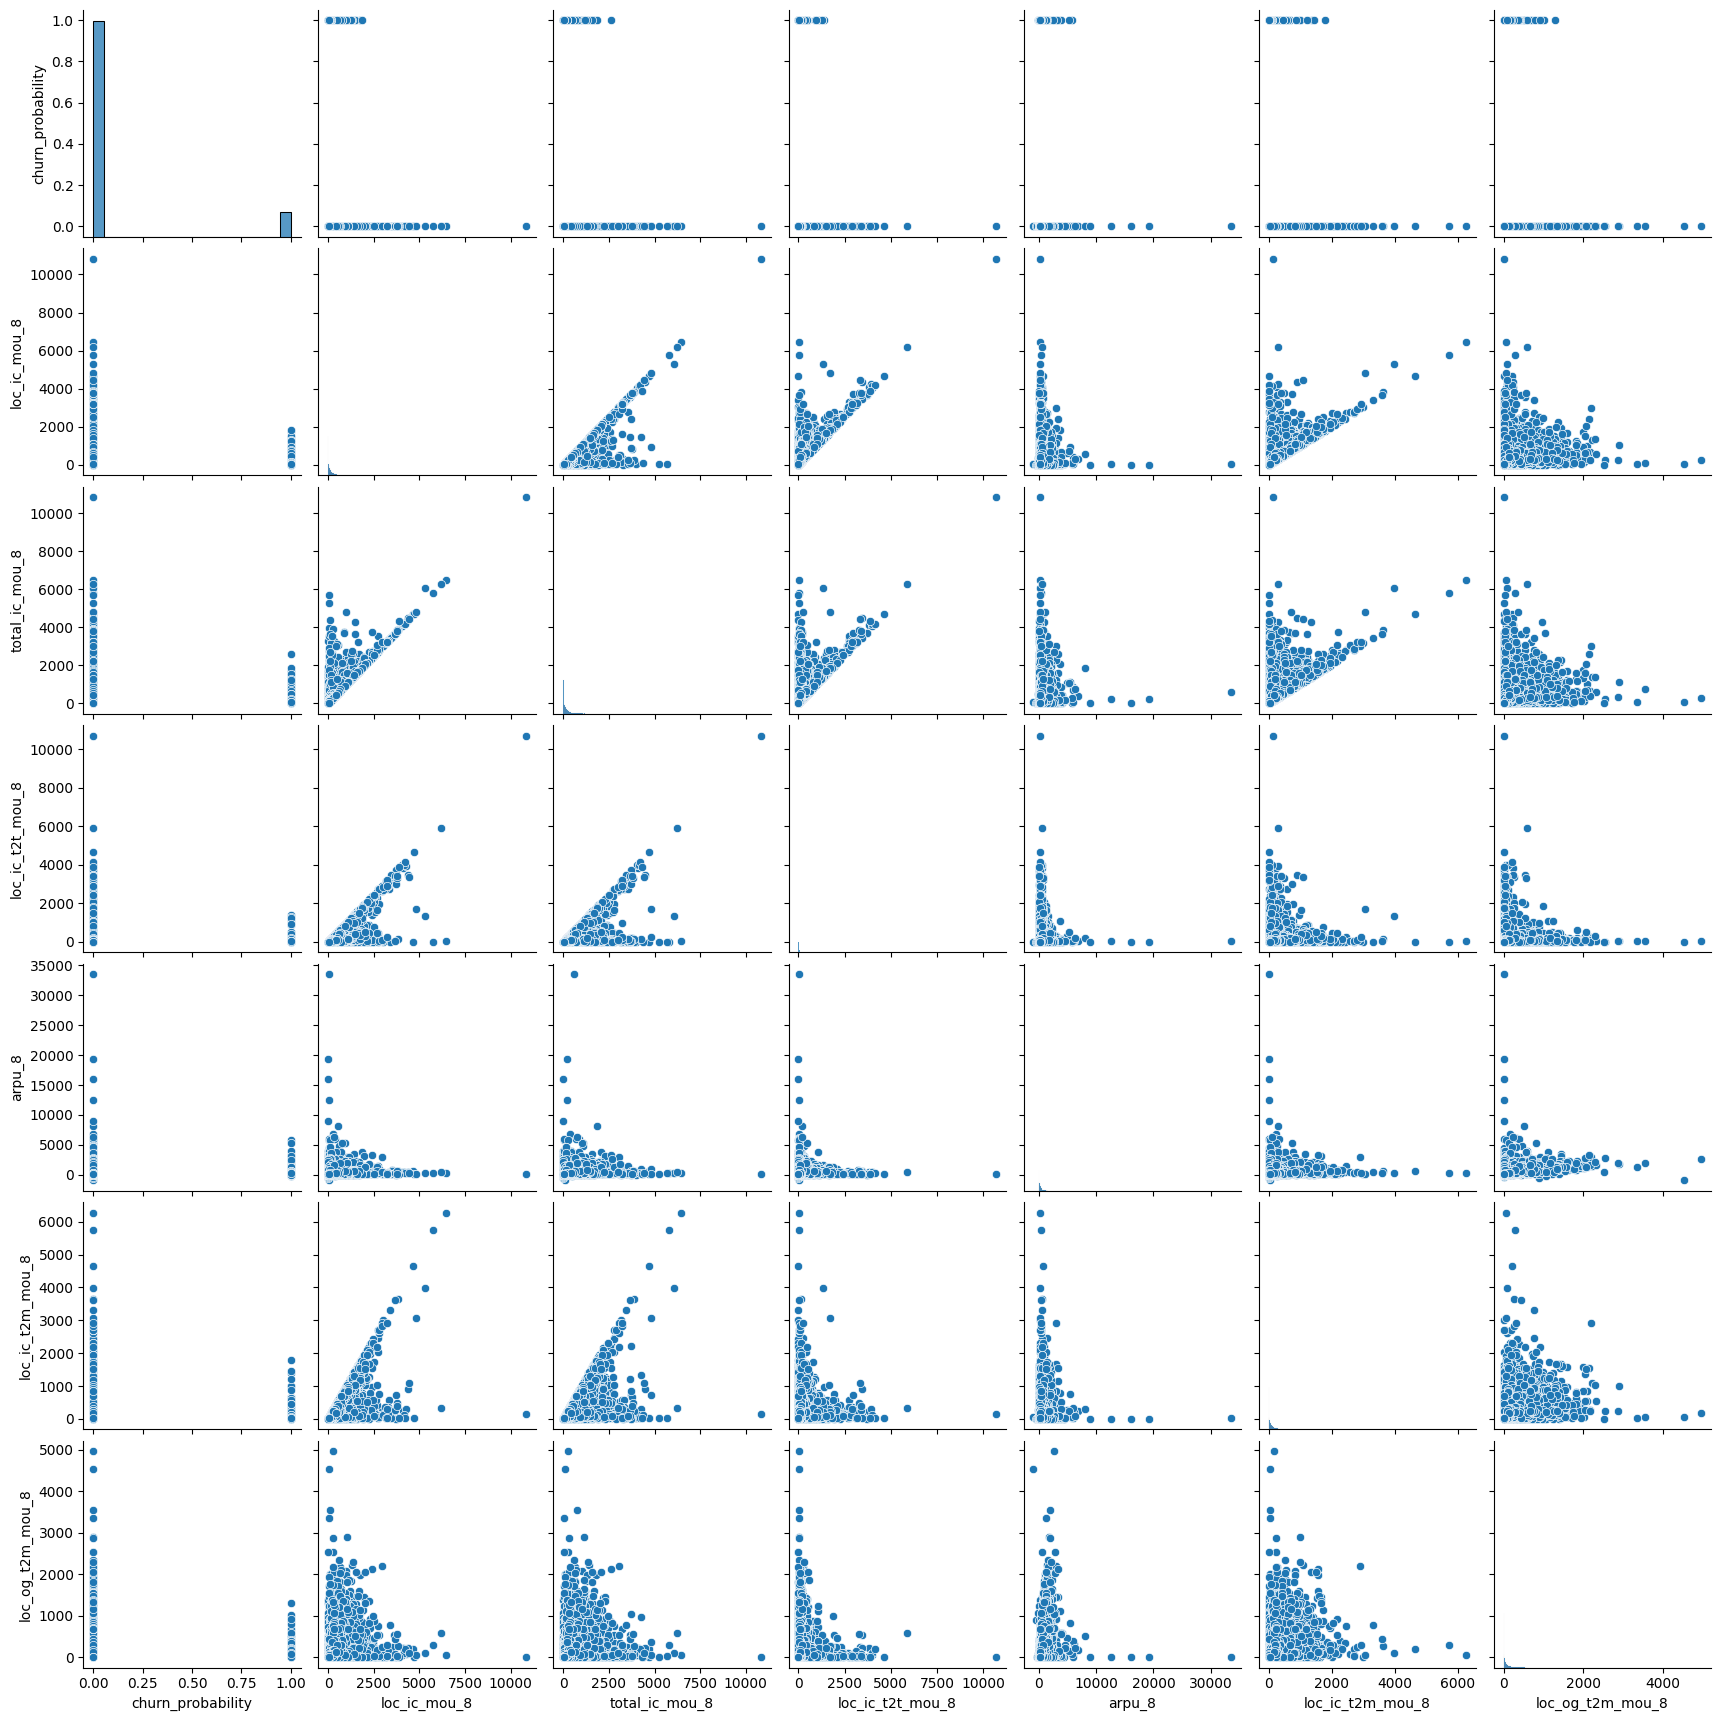

In [498]:
sns.pairplot(data,vars=["churn_probability","loc_ic_mou_8","total_ic_mou_8","loc_ic_t2t_mou_8","arpu_8","loc_ic_t2m_mou_8","loc_og_t2m_mou_8"])
plt.show()

### <font color= purple>Observations:</font>
- We see a linear relationship between loc_ic_t2m_mou_8 and loc_ic_mou_8. Similarly between total_ic_mou_8 and local_ic_mou_8 which is pretty obvious and should be evident. Not alot of inferences can be made. 

##### Below is a modified code that was provided by a PI who took a session on the telecom churn case

In [515]:
# Define a function to determine the data type of a variable
def get_data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

# Define a function for univariate analysis
def univariate_analysis(variable, stats=True):
    data_type = get_data_type(variable)
    
    if data_type == 'numerical':
        sns.distplot(variable)
        if stats:
            print(variable.describe())
    
    elif data_type == 'categorical':
        sns.countplot(variable)
        if stats:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: please provide either a numeric or a categorical variable.")

# Define a function for bivariate analysis
def bivariate_analysis(var1, var2):
    type_var1, type_var2 = get_data_type(var1), get_data_type(var2)
    
    if type_var1 == 'numerical' and type_var2 == 'numerical':
        sns.regplot(x=var1, y=var2, data=data)
    elif (type_var1 == 'categorical' and type_var2 == 'numerical') or (type_var1 == 'numerical' and type_var2 == 'categorical'):        
        sns.boxplot(x=var1, y=var2, data=data)
       

### Univariate EDA

count    69999.000000
mean       158.295100
std        245.472552
min          0.000000
25%         24.830000
50%         85.010000
75%        198.000000
max      10830.160000
Name: loc_ic_mou_8, dtype: float64


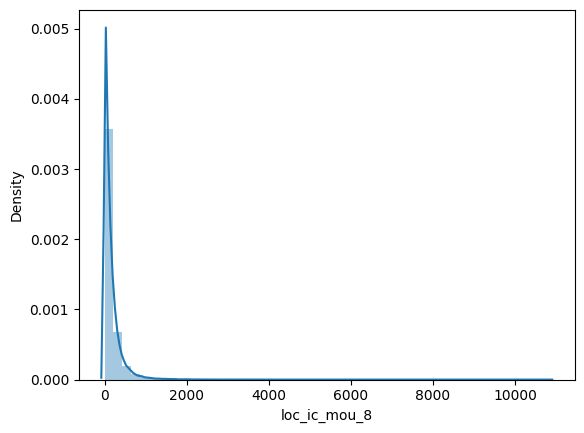

In [504]:
univariate_analysis(data.loc_ic_mou_8)

### <font color= purple>Observations:</font>
- The graph is skewed towards the left. The average number of local incoming call for the month of august is about 158. 

count    69999.000000
mean       278.858826
std        351.924315
min       -945.808000
25%         84.095000
50%        192.234000
75%        369.909000
max      33543.624000
Name: arpu_8, dtype: float64


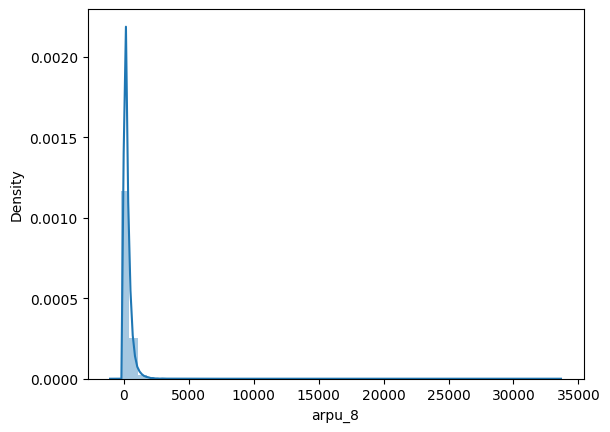

In [505]:
univariate_analysis(data.arpu_8)

### <font color= purple>Observations:</font>
- The mean Average Revenue Per User (ARPU) is ~278. The max is 33543.62. The graph is skewed toward the left. 

count    69999.000000
mean        -0.731368
std          0.455554
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64


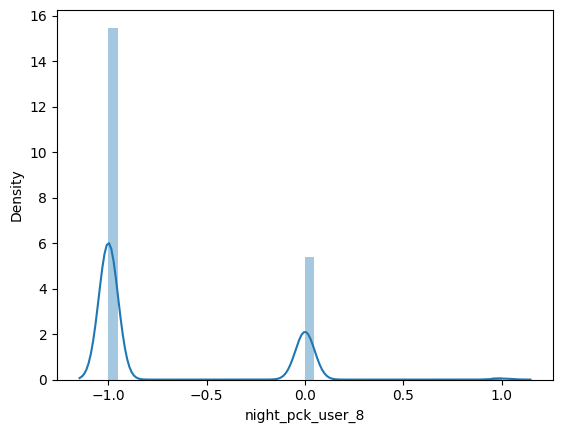

In [511]:
univariate_analysis(data.night_pck_user_8)

### <font color= purple>Observations:</font>
- Most of the night_pck_user for the month of august falls under -1 followed by 0 and the least falls under 1. 

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
25%        468.000000
50%        868.000000
75%       1813.000000
max       4337.000000
Name: aon, dtype: float64


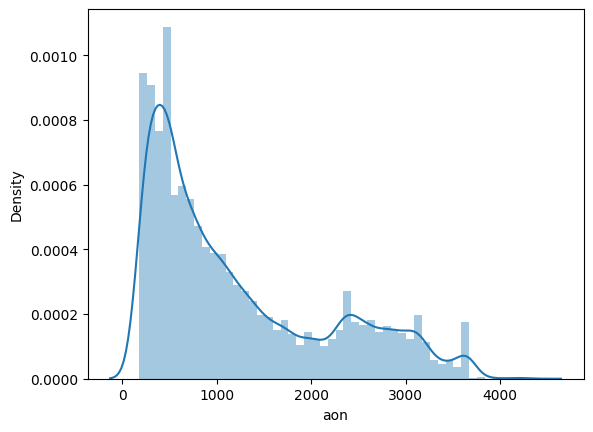

In [509]:
univariate_analysis(data.aon)

### <font color= purple>Observations:</font>
-  Age on network(aon) ranges from 180 to 4337 with majority of the users falling under the 180 to 1000 range 

#### Bivariate Analysis

In [ ]:
data.pivot_table(values='churn_probability', index='loc_ic_mou_8', columns='total_og_mou_8', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

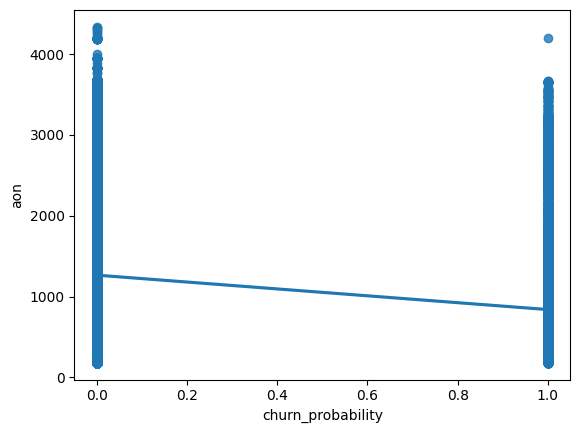

In [516]:
bivariate_analysis(data.churn_probability, data.aon)

### <font color= purple>Observations:</font>
- The higher the aon less likely is the user to churn. Although not always.  

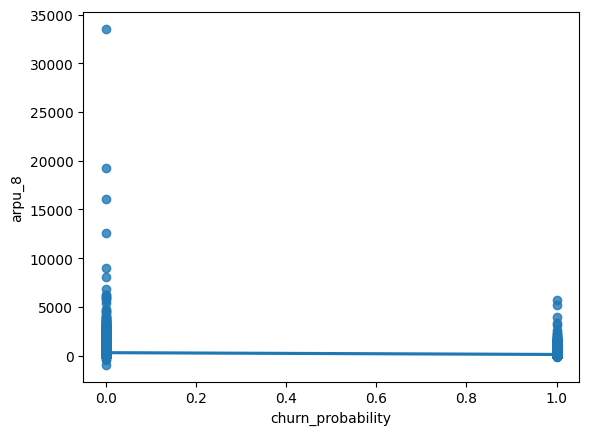

In [518]:
bivariate_analysis(data.churn_probability, data.arpu_8)

### <font color= purple>Observations:</font>
- Higher the arpu_8, less is the churn probability. Seems like a potentiall good predictor.

## Data Preparation

In [411]:
data_filtered.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,...,1.0,0.0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0
1,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0.0,0.0,1.0,-1.0,1.0,602.0,0.0,0.00,0.00,0
2,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0.0,0.0,-1.0,-1.0,-1.0,455.0,0.0,0.00,0.00,0
3,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0.0,0.0,0.0,0.0,0.0,1219.0,0.0,0.00,0.00,0
4,27,0.0,0.0,0.0,390.489,350.985,421.300,8.58,11.48,12.68,...,1.0,1.0,1.0,1.0,1.0,573.0,700.4,185.71,173.72,0


In [412]:
data_filtered.shape

(21013, 150)

In [413]:
data_filtered['churn_probability'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21013 entries, 0 to 21012
Series name: churn_probability
Non-Null Count  Dtype
--------------  -----
21013 non-null  int64
dtypes: int64(1)
memory usage: 164.3 KB


In [478]:
# Splitting data into train and test
X = data_filtered.drop("churn_probability", axis = 1)
y = data_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [479]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759, 149)
(15759,)
(5254, 149)
(5254,)


In [480]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [417]:
X_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 15759 entries, 13528 to 20561
Data columns (total 149 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   l

In [481]:
print("Unique Values in y:", y.unique())

Unique Values in y: [0 1]


##### Unseen data prep

In [419]:
unseen.shape

(30000, 171)

In [420]:
# Display the entire list of column names in X_train
column_names = X_train.columns.to_list()
print(column_names)

['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8

In [482]:
### Storing the variable column names in new_vars
new_vars =['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [422]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,-1.0,-1.0,-1.0,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,-1.0,-1.0,-1.0,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,-1.0,-1.0,-1.0,462,0.00,0.00,0.00


In [483]:
unseen = unseen[new_vars]

In [424]:
unseen.shape

(30000, 149)

### Feature Scaling

In [484]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

In [485]:
# Use the scaler to fit and transform the selected numerical columns in the training data
X_train[num_cols2] = scaler.fit_transform(X_train[num_cols2])

In [486]:
X_train[num_cols2].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,15759.0,15759.0,15759.0,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,...,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04,1.575900e+04
mean,0.0,0.0,0.0,2.028963e-17,2.823640e-16,1.018990e-16,4.508806e-18,-2.389667e-17,4.508806e-17,9.739021e-17,...,-8.521643e-17,4.959687e-18,-1.803522e-17,2.930724e-17,4.598982e-17,7.169002e-17,-4.508806e-18,-1.176798e-16,-2.795460e-17,-8.115851e-18
std,0.0,0.0,0.0,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,0.0,0.0,0.0,-3.952408e+00,-4.095734e+00,-3.778709e+00,-6.523462e-01,-6.428128e-01,-6.055516e-01,-8.924092e-01,...,-3.991342e-01,-3.989521e-01,-3.873607e-01,-2.996780e-01,-2.965039e-01,-2.654647e-01,-1.084157e+00,-4.738341e-01,-4.728431e-01,-4.512265e-01
25%,0.0,0.0,0.0,-6.696564e-01,-6.641679e-01,-6.953965e-01,-6.081138e-01,-6.030502e-01,-5.783855e-01,-7.130985e-01,...,-3.991342e-01,-3.989521e-01,-3.873607e-01,-2.996780e-01,-2.965039e-01,-2.654647e-01,-7.893672e-01,-4.738341e-01,-4.728431e-01,-4.512265e-01
50%,0.0,0.0,0.0,-1.839132e-01,-1.892542e-01,-1.779430e-01,-4.266786e-01,-4.323790e-01,-4.243325e-01,-3.321005e-01,...,-3.991342e-01,-3.989521e-01,-3.873607e-01,-2.996780e-01,-2.965039e-01,-2.654647e-01,-3.676391e-01,-4.738341e-01,-4.728431e-01,-4.512265e-01
75%,0.0,0.0,0.0,4.156765e-01,4.067721e-01,4.308916e-01,1.157074e-01,9.462923e-02,5.848058e-02,3.267545e-01,...,-3.991342e-01,-3.989521e-01,-3.873607e-01,-2.996780e-01,-2.965039e-01,-2.654647e-01,5.802001e-01,-7.954400e-02,-8.496923e-02,-1.541251e-01
max,0.0,0.0,0.0,4.016494e+00,4.166555e+00,4.125842e+00,3.763038e+00,3.785696e+00,3.945788e+00,3.628865e+00,...,3.721638e+00,3.847961e+00,3.781917e+00,5.672812e+00,5.636472e+00,6.195222e+00,3.002012e+00,3.970992e+00,3.973433e+00,4.110118e+00


In [487]:
# Transform the selected numerical columns in the test data using the same fitted scaler
X_test[num_cols2] = scaler.transform(X_test[num_cols2])

In [488]:
# Transform the selected numerical columns in the unseen data using the same fitted scaler
unseen[num_cols2] = scaler.transform(unseen[num_cols2])

## Modelling

In [527]:
# import required libraries

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### PCA for dimensionality reduction

In [430]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [431]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [432]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.39
1       24.20
2       30.50
3       35.43
4       39.66
        ...  
144    100.00
145    100.00
146    100.00
147    100.00
148    100.00
Length: 149, dtype: float64


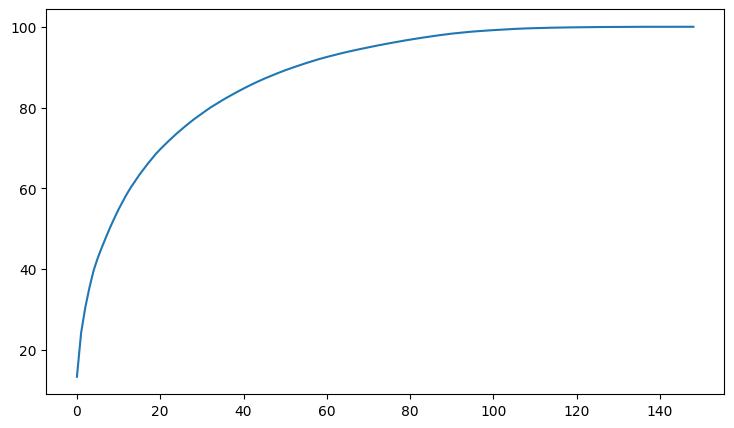

In [433]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### <font color= purple>Observations:</font>
- 60 components (more or less) explains 95% of the variance
- 50 omponents (more or less) explains 90% of the variance

#### PCA and Logistic Regression

In [434]:
# creating pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [435]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8261945554920997

In [436]:
# check score on test data
pipeline.score(X_test, y_test)

0.8176627331556909

In [437]:
# Predict churn on the test data using the pipeline
predicted_labels = pipeline.predict(X_test)

# Create a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", confusion_matrix_result)

# Evaluate sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predicted_labels, average='binary')
print(f"Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}")

# Calculate and display the Area Under the Curve (AUC) score
predicted_probabilities = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predicted_probabilities)
print(f"AUC: {round(auc_score, 2)}")

Confusion Matrix:
 [[3942  877]
 [  81  354]]
Sensitivity: 0.81
Specificity: 0.82
AUC: 0.89


### PCA and Logistic Regression with hypertuning 
Let's see how we can improve our model by hypertuning the parameters in PCA and Logistic Rgression

In [489]:
# Principal Component Analysis (PCA)
pca = PCA()

# Logistic Regression with class weight adjustment for handling class imbalance
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# Create a pipeline with StandardScaler, PCA, and Logistic Regression
pipeline_steps = [
    ("scaler", StandardScaler()),
    ("pca", pca),
    ("logistic", logistic)
]

# Compile the pipeline
pca_logistic_pipeline = Pipeline(pipeline_steps)

# Hyperparameter space for GridSearchCV
param_grid = {
    'pca__n_components': [60, 80],
    'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
    'logistic__penalty': ['l1', 'l2']
}

# Create 5 folds for StratifiedKFold cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Create GridSearchCV object for hyperparameter tuning
grid_search_model = GridSearchCV(
    estimator=pca_logistic_pipeline,
    cv=folds,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [490]:
# fitting the model on train set
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [440]:
# cross validation results
pd.DataFrame(grid_search_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.434000,0.036595,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,0.346336,0.050047,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,0.278597,0.003715,0.010697,0.001563,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.898738,0.894926,0.879624,0.894486,0.899258,0.893406,0.007157,11
3,0.364354,0.002621,0.010934,0.001164,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.898806,0.897475,0.884061,0.898646,0.900208,0.895839,0.005953,8
4,0.244667,0.008927,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,0.300259,0.008180,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,0.277750,0.007574,0.009507,0.000455,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.898106,0.895238,0.879112,0.894847,0.899345,0.893330,0.007309,15
7,0.353775,0.005636,0.009723,0.000618,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.899282,0.898774,0.883961,0.897955,0.899735,0.895942,0.006019,7
8,0.231805,0.004499,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,0.287204,0.005426,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [491]:
# printing the best hyperparameters
print("Best AUC: ", grid_search_model.best_score_)
print("Best hyperparameters: ", grid_search_model.best_params_)

Best AUC:  0.8965838695921354
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [492]:
# Predict churn on the test data using the tuned model
predicted_labels = grid_search_model.predict(X_test)

# Create a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", confusion_matrix_result)

# Evaluate sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predicted_labels, average='binary')
print(f"Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}")

# Calculate and display the Area Under the Curve (AUC) score
predicted_probabilities = grid_search_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predicted_probabilities)
print(f"AUC: {round(auc_score, 2)}")

Confusion Matrix:
 [[4089  730]
 [  90  345]]
Sensitivity: 0.79
Specificity: 0.85
AUC: 0.89


In [493]:
# Create pipeline with the best hyperparameters obtained from grid search
PCA_VARS = 80
steps = [
    ('scaler', StandardScaler()),
    ("pca", PCA(n_components=PCA_VARS)),
    ("logistic", LogisticRegression(class_weight={0: 1, 1: 3}, C=0.1, penalty='l2'))  # Provide the correct class weights
]
pipeline2 = Pipeline(steps)


In [494]:
# fit model
pipeline2.fit(X_train, y_train)

# check score on train data
pipeline2.score(X_train, y_train)

0.9225204644964782

In [495]:
# check score on test data
pipeline2.score(X_test, y_test)

0.9128283212790255

In [521]:
precision_score(y_test, pipeline2.predict(X_test))

0.47971781305114636

In [522]:
recall_score(y_test, pipeline2.predict(X_test))

0.6252873563218391

### Random forest
Let's get the best parameters for our model Random Forest using GridSearchCV and apply them to predict on the test

In [205]:
# Random Forest Classifier with class weight adjustment for handling class imbalance
forest = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

# Hyperparameter space for GridSearchCV
param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_features": ['auto', 0.4]
}

# Create 5 folds for StratifiedKFold cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Create GridSearchCV object for hyperparameter tuning
grid_search_model = GridSearchCV(
    estimator=forest,
    cv=folds,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [206]:
# fit model on train set
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [207]:
# printing the best hyperparameters
print("Best AUC: ", grid_search_model.best_score_)
print("Best hyperparameters: ", grid_search_model.best_params_)

Best AUC:  0.9269516731447933
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [208]:
# Predict churn on the test data using the tuned model
predicted_labels = grid_search_model.predict(X_test)

# Create a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", confusion_matrix_result)

# Evaluate sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predicted_labels, average='binary')
print(f"Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}")

# Calculate and display the Area Under the Curve (AUC) score
predicted_probabilities = grid_search_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predicted_probabilities)
print(f"AUC: {round(auc_score, 2)}")


Confusion Matrix:
 [[4736   83]
 [ 228  207]]
Sensitivity: 0.48
Specificity: 0.98
AUC: 0.92


In [263]:
# Create the pipeline with Random Forest
steps = [('scaler', StandardScaler()),  
         ("rf", RandomForestClassifier(criterion = 'entropy', max_features = 0.4)) 
        ]
pipeline_rf = Pipeline(steps)

In [264]:
# fit model
pipeline_rf.fit(X_train, y_train)

# check score on train data
pipeline_rf.score(X_train, y_train)

0.9999365441969668

In [211]:
# check score on test data
pipeline_rf.score(X_test, y_test)

0.9409973353635326

In [523]:
precision_score(y_test, pipeline_rf.predict(X_test))

0.7070063694267515

In [524]:
recall_score(y_test, pipeline_rf.predict(X_test))

0.6252873563218391

### Testing the models on Unseen dataset

In [238]:
unseen.shape

(30000, 149)

#### PCA Plus Logistic regrression

In [239]:
# Create pipeline for PCA and lr with the best hyperparameters obtained from grid search
PCA_VARS = 80
steps = [
    ('scaler', StandardScaler()),
    ("pca", PCA(n_components=PCA_VARS)),
    ("logistic", LogisticRegression(class_weight={0: 1, 1: 3}, C=3, penalty='l2'))  # Provide the correct class weights
]
pipeline2 = Pipeline(steps)


In [258]:
unseen['churn_probability'] = pipeline2.predict(unseen)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [260]:

output.to_csv('submission_pca_lr_6march24.csv',index=False)

#### Testing unseen data with Random Forest model

In [265]:
unseen['churn_probability'] = pipeline_rf.predict(unseen)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [266]:
output.to_csv('submission_Randon_forest1_6march24.csv',index=False)

#### Testing on unseen with a pipiline that includes imputation, scaling, PCA and logistic Regression

In [ ]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=80)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [ ]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [268]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=80)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [236]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.927483821850019


In [235]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9329272161939209


In [271]:
unseen['churn_probability'] = pipe.predict(unseen)
output3 = unseen[['id','churn_probability']]
output3.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


### <font color= purple>Inferences from model performance:</font>
- Logistic Regression and PCA pipline with hypertuning gives a pretty good score: Train:0.9225204644964782 , Test: 0.9128283212790255
- Random Forsest gave really good score on the train set: 0.9999365441969668 . The test set had a score of 0.9409973353635326. however, the sensitivity of this model leaves very little to be desired. It was very poor.
- Surprisingly, Random forest gave the best score on the unseen data that was subitted to Kaggle.

### Determinng the top features that influence churn probability

In [331]:
# Determine the number of variables to consider for each node split
max_features = int(round(np.sqrt(X_train.shape[1])))
print(f"Number of features to consider: {max_features}")

# Create a Random Forest model with specified parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features=max_features,
    class_weight={0: 0.1, 1: 0.9},
    oob_score=True,
    random_state=4,
    verbose=1
)

Number of features to consider: 12


In [332]:
# fit model on train set
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [333]:
# Checking the OOB score
rf_model.oob_score_

0.9425090424519322

In [334]:
# Predict churn on the test data using the Random Forest model
predicted_labels = rf_model.predict(X_test)

# Create a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", confusion_matrix_result)

# Evaluate sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predicted_labels, average='binary')
print(f"Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}")

# Calculate and display the Area Under the Curve (AUC) score
predicted_probabilities = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probabilities)
print(f"ROC AUC: {round(roc_auc, 2)}")

Confusion Matrix:
 [[4748   71]
 [ 238  197]]
Sensitivity: 0.45
Specificity: 0.99
ROC AUC: 0.92


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### Extracting important predictors/ Feature importance

In [335]:
# Extracting predictors from the feature set
features = data_filtered.drop('churn_probability', axis=1).columns

# Extracting feature importance from the Random Forest model
importance = rf_model.feature_importances_

# Creating a DataFrame to store feature importance details
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance * 100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# Sorting features based on their importance
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
total_importance = feature_importance.importance_percentage.sum()

# Printing the total sum of importance
print("Total Importance:", total_importance)

# Displaying the sorted feature importance DataFrame
feature_importance

Total Importance: 100.0


,variables,importance_percentage
0,loc_ic_mou_8,5.204907
1,total_ic_mou_8,4.801543
2,loc_ic_t2t_mou_8,4.774565
3,arpu_8,4.302298
4,loc_ic_t2m_mou_8,4.076044
...,...,...
144,loc_ic_t2o_mou,0.000000
145,std_og_t2o_mou,0.000000
146,loc_og_t2o_mou,0.000000
147,std_ic_t2o_mou_7,0.000000


#### Selecting the top 30 features

In [336]:
# Extractting top 30 features
top_n = 30
top_features = feature_importance.variables[0:top_n]

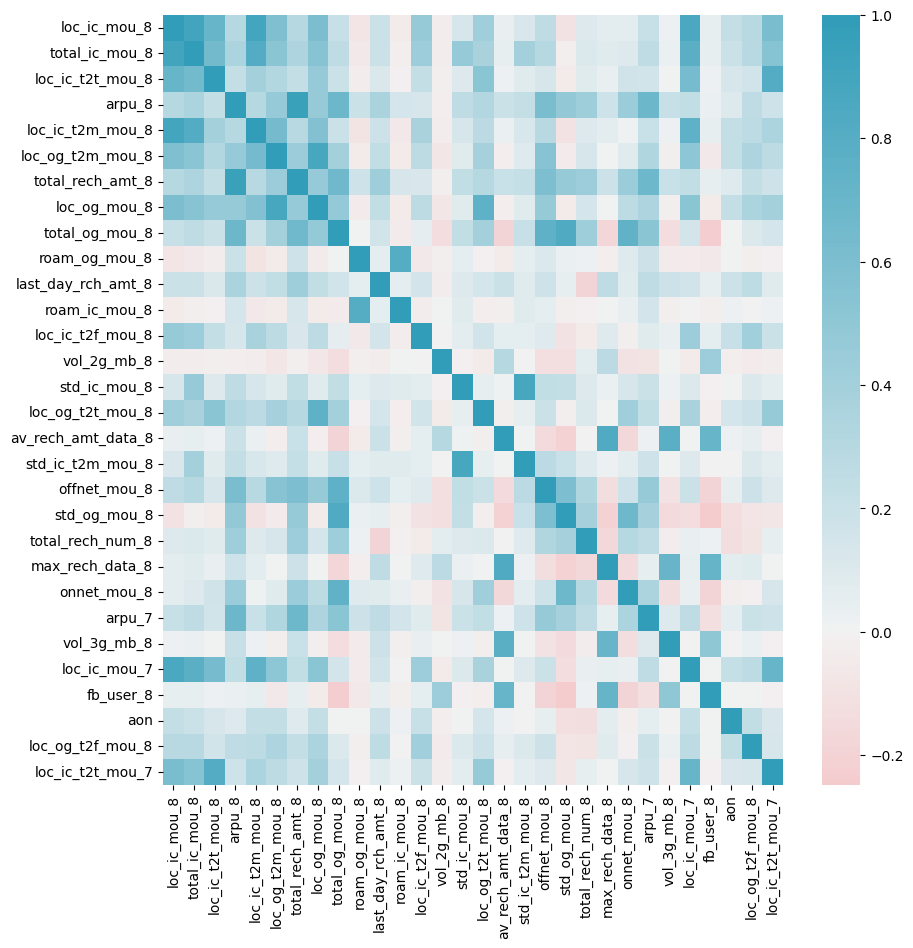

In [339]:
## Feature correlation plot
# Set the figure size 
plt.figure(figsize=(10, 10))

# Define a unique diverging color palette for the heatmap
my_cmap = sns.diverging_palette(h_neg=10, h_pos=220, s=90, l=60, n=200, center="light", as_cmap=True)

# Select top features from X_train (replace 'top_features' with your actual variable)
selected_features = X_train[top_features]

# Create a heatmap of feature correlation
sns.heatmap(data=selected_features.corr(), center=0.0, cmap=my_cmap)

# Display the plot
plt.show()

In [340]:
top_features

0           loc_ic_mou_8
1         total_ic_mou_8
2       loc_ic_t2t_mou_8
3                 arpu_8
4       loc_ic_t2m_mou_8
5       loc_og_t2m_mou_8
6       total_rech_amt_8
7           loc_og_mou_8
8         total_og_mou_8
9          roam_og_mou_8
10    last_day_rch_amt_8
11         roam_ic_mou_8
12      loc_ic_t2f_mou_8
13           vol_2g_mb_8
14          std_ic_mou_8
15      loc_og_t2t_mou_8
16    av_rech_amt_data_8
17      std_ic_t2m_mou_8
18          offnet_mou_8
19          std_og_mou_8
20      total_rech_num_8
21       max_rech_data_8
22           onnet_mou_8
23                arpu_7
24           vol_3g_mb_8
25          loc_ic_mou_7
26             fb_user_8
27                   aon
28      loc_og_t2f_mou_8
29      loc_ic_t2t_mou_7
Name: variables, dtype: object

In [341]:
# Selecting the top features from the training and testing datasets
top_features = ['total_ic_mou_8', 'total_ic_mou_8', 'loc_ic_t2t_mou_8', 'arpu_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'total_rech_amt_8', 'loc_og_mou_8', 'total_og_mou_8', 'roam_og_mou_8', 'last_day_rch_amt_8', 'roam_ic_mou_8', 'loc_ic_t2f_mou_8', 'vol_2g_mb_8', 'std_ic_mou_8', 'loc_og_t2t_mou_8', 'av_rech_amt_data_8', 'std_ic_t2m_mou_8', 'offnet_mou_8', 'std_og_mou_8', 'total_rech_num_8', 'max_rech_data_8', 'onnet_mou_8', 'arpu_7', 'vol_3g_mb_8', 'loc_ic_mou_7', 'fb_user_8', 'aon', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_7']
X_train = X_train[top_features]  # Selecting top features for training dataset
X_test = X_test[top_features]  # Selecting top features for testing dataset

In [342]:
# Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ("logistic", LogisticRegression(class_weight={0: 0.1, 1: 0.9}))
])

# Hyperparameter space for GridSearchCV
param_grid = {
    'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
    'logistic__penalty': ['l1', 'l2']
}

# Create 5 folds for StratifiedKFold cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Create GridSearchCV object for hyperparameter tuning
grid_search_model = GridSearchCV(
    estimator=logistic_pipeline,
    cv=folds,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [343]:
# fit model on train set
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/ayang/Documents/Assignments/assignments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ayang/Documents/Assignments/assignments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [344]:
# print best hyperparameters
print("Best AUC: ", grid_search_model.best_score_)
print("Best hyperparameters: ", grid_search_model.best_params_)

Best AUC:  0.8894352005364781
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2'}


In [346]:
# Predict churn on the test data
y_pred = grid_search_model.predict(X_test)

# Create and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate and display sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(f"Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}")

# Calculate and display ROC AUC score
roc_auc = roc_auc_score(y_test, grid_search_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {round(roc_auc, 2)}")

Confusion Matrix:
 [[4046  773]
 [  92  343]]
Sensitivity: 0.79
Specificity: 0.84
ROC AUC: 0.89


### Determinng the coefficients and the intercept from the logistic Regression model

In [347]:
# Accessing the 'logistic' estimator from the best performing model obtained from the grid search
logistic_model = grid_search_model.best_estimator_.named_steps['logistic']

In [348]:
# Create a DataFrame for the intercept of the logistic regression model
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [351]:
# Get the coefficients from the logistic regression model
coefficients = logistic_model.coef_.tolist()

# Flatten the list of coefficients
coefficients = [val for sublist in coefficients for val in sublist]

# Round the coefficients to three decimal places
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)


In [352]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_ic_mou_8,loc_ic_t2t_mou_8,arpu_8,loc_ic_t2m_mou_8,loc_og_t2m_mou_8,total_rech_amt_8,loc_og_mou_8,total_og_mou_8,...,total_rech_num_8,max_rech_data_8,onnet_mou_8,arpu_7,vol_3g_mb_8,loc_ic_mou_7,fb_user_8,aon,loc_og_t2f_mou_8,loc_ic_t2t_mou_7
0,-1.680597,-0.065944,-0.065944,-0.581867,0.110972,-1.135152,-0.881912,-0.021742,0.961275,0.271838,...,-0.571995,0.104698,-0.66354,0.437184,-0.10904,0.549243,-0.48609,-0.274288,0.035149,0.075671


## <font color= Green>Recommendation:</font>

### Based on the top features that were determined to influence churn probability:
- The telecom company should maintain  the rates for making calls or recieving calls as the features for **`toal incoming or outgoing call made locally`** **reduces** the churn probability. The company should encourage the ease of incoming and outing call to be made by customers without having to near much fees. Concepts like `unlimited` incoming and outgoing calls for recharge packages that are very popular among customers should be encouraged or advertised more. 
- Since local incoming calls within the same telecom circle is the top predictor and it reducees churn rate, schemes or attractive packages that encourages the same should be implemented. 
- `Average Revenue Per User` (ARPU) elevates the churn probability from our obseravtion of this case and this posses a challenge for the company. This scenario implies that, despite higher revenue per user, customers are more likely to leave or discontinue their services. This can be due to:
   - Pricing Sensitivity: The increase in ARPU may be due to higher prices or changes in service plans, leading to customers perceiving the services as less cost-effective.
   - Competitive Offerings: Customers might be enticed by more competitive offerings from other providers, prompting them to switch despite the higher ARPU.
   - Customer Dissatisfaction: Higher ARPU might be linked to upselling or additional charges that result in dissatisfaction among customers, prompting them to consider alternatives.
Strategies to metigate this could include:
   - `Value Communication`: Clearly communicate the additional value or benefits associated with the increased ARPU to customers. Ensure they understand and appreciate the enhanced services or features.
   - `Personalized Offerings`: Tailor offerings to individual customer needs and preferences. Consider providing personalized discounts, loyalty programs, or exclusive offers to retain high-value customers. 
   - `Competitive Analysis`: Keep a close eye on the offerings of competitors. If there are more appealing options in the market, consider adjusting pricing or service plans to remain competitive.
- `Total outgoing and roaming calls` **increases** churn probability and so the company can tailor attractive packages with **competitive prices** for making outgoing and roaming calls. 

#### <font color= Red>NOTE:</font>
The best hyperparameters may change with each run for Random forest beacause that what i observed when i re-ran the code several times. Please make sure that the parameter are changed accordingly in the subsequent code to obtain the accuracy score. 